# Assignment 3

Marissa Berk

In this Notebook, we'll be looking at _multiple linear regression_. Multiple linear regression is a linear model with multiple independent variables (predictors). Linear regression attempts to model the relationship between two variables by fitting a linear equation to the data. In this case we will be looking at the linear regression of predicted ratings and actual ratings.

We'll use a dataset from [Mashable](https://archive.ics.uci.edu/ml/datasets/online+news+popularity). 

Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what we will be exploring through _multiple linear regression_.

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('data Mashable.csv')
df = df.dropna()
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


There are a number of variables, including a few so-called _dummy variables_ that indicate the day of the week the article was posted with 0's and 1's. The variables we will use for this multiple linear regression are showed in the table below.

In [7]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


The correlation table shows us how the variables correlate to one another. For this case we are interested in how the variables correlate to shares log so we can build a prediction model that is accurate.

In [9]:
y = df['shares_log'] #We need to take out the rating as our Y-variable
X = df.loc[:,'is_weekend':'title_sentiment_polarity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['url'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0.439379,0.082486,0.666667,0.375
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,0.300454,0.027715,0.000000,0.000
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0.575486,0.259120,0.000000,0.000
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0.327220,0.134424,0.000000,0.000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0.507709,0.109256,0.000000,0.000


We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [10]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,1,0.451711,0.230736,0.500000,0.136364
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0,0.476976,0.078816,0.100000,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0,0.488495,0.263511,0.000000,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0,0.545746,0.052758,0.454545,0.136364
http://mashable.com/2013/08/28/chef-knife-moves-video/,0,0.507042,0.063513,0.750000,0.000000


Now, let's train the linear model.

In [11]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's have a look at the coefficients.

In [12]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.130050,is_weekend
0.284136,global_subjectivity
0.087640,global_sentiment_polarity
0.032549,title_subjectivity
0.051784,title_sentiment_polarity


We can interpret these coefficients as follows:

* The intercept makes no sense and does not need to be interpreted. Why not? Because it's the value when all X's are 0. And is just a mathematical assumption.
* If an article is posted on the weekend, it adds 0.13 to its rating
* If an article is globally subjective, it adds 0.28 to its rating
* If an article has global sentiment polarity, it adds 0.087 to its rating
* If an article has title subjectivity, it adds 0.032 to its rating
* If an article has title sentiment polarity, it adds 0.052 to its rating

Finally, let's look at the model performance. We'll generate predictions and calculate the R^2 and RMSE.

**Remember that we are always looking at performance on the test data!**

In [13]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.022465298589432248

The R^2 is approximately 0.023, which means 23% of the variation is explained by the model. That's not too bad. Let's calculate the RMSE: the root mean squared error.

In [14]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40144486370613974

The RMSE is 0.401. Which means that we are typically about 0.40 off in our predicted rating (which goes from 0-10). Finally, let's plot the predicted value against the actual rating.

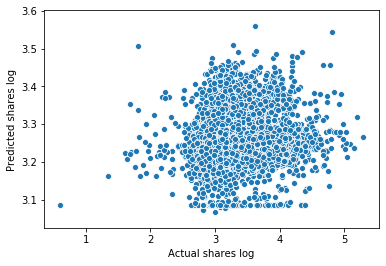

In [15]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')

plt.show()

Here we see the predicted shares log (y axis) and the actual shares log (x axis) it is important to note that the x and y-axis limits are not the same. In order to accurately see the relationship between acutal and predicted shares we must force these axes to be the same.

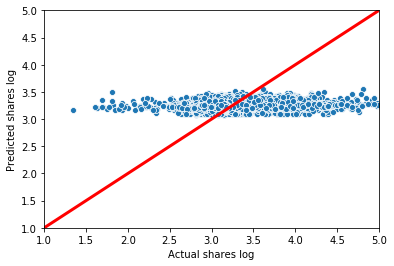

In [16]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')
plt.xlim([1,5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,5])
plt.plot([1, 5], [1, 5], color='red', lw=3) #Plot a diagonal length
plt.show()

In this graph we can see that the prediction is not very accurate. For the articles with less _shares_log_ (1-3) the predicted shares are higher than the actual shares. And for the articles with more _shares_log_ (3-5) the predicted shares are lower than the actual shares. For the articles that have a log share of 3, the prediction is very accurate.